### Creating An ANN Model using Pytorch

In [211]:
#Import libraries
import pandas as pd
#link to the dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database
df=pd.read_csv('diabetes.csv') 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [212]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [213]:
import seaborn as sns

In [214]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","Not Diabetic")

In [215]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Not Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Not Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


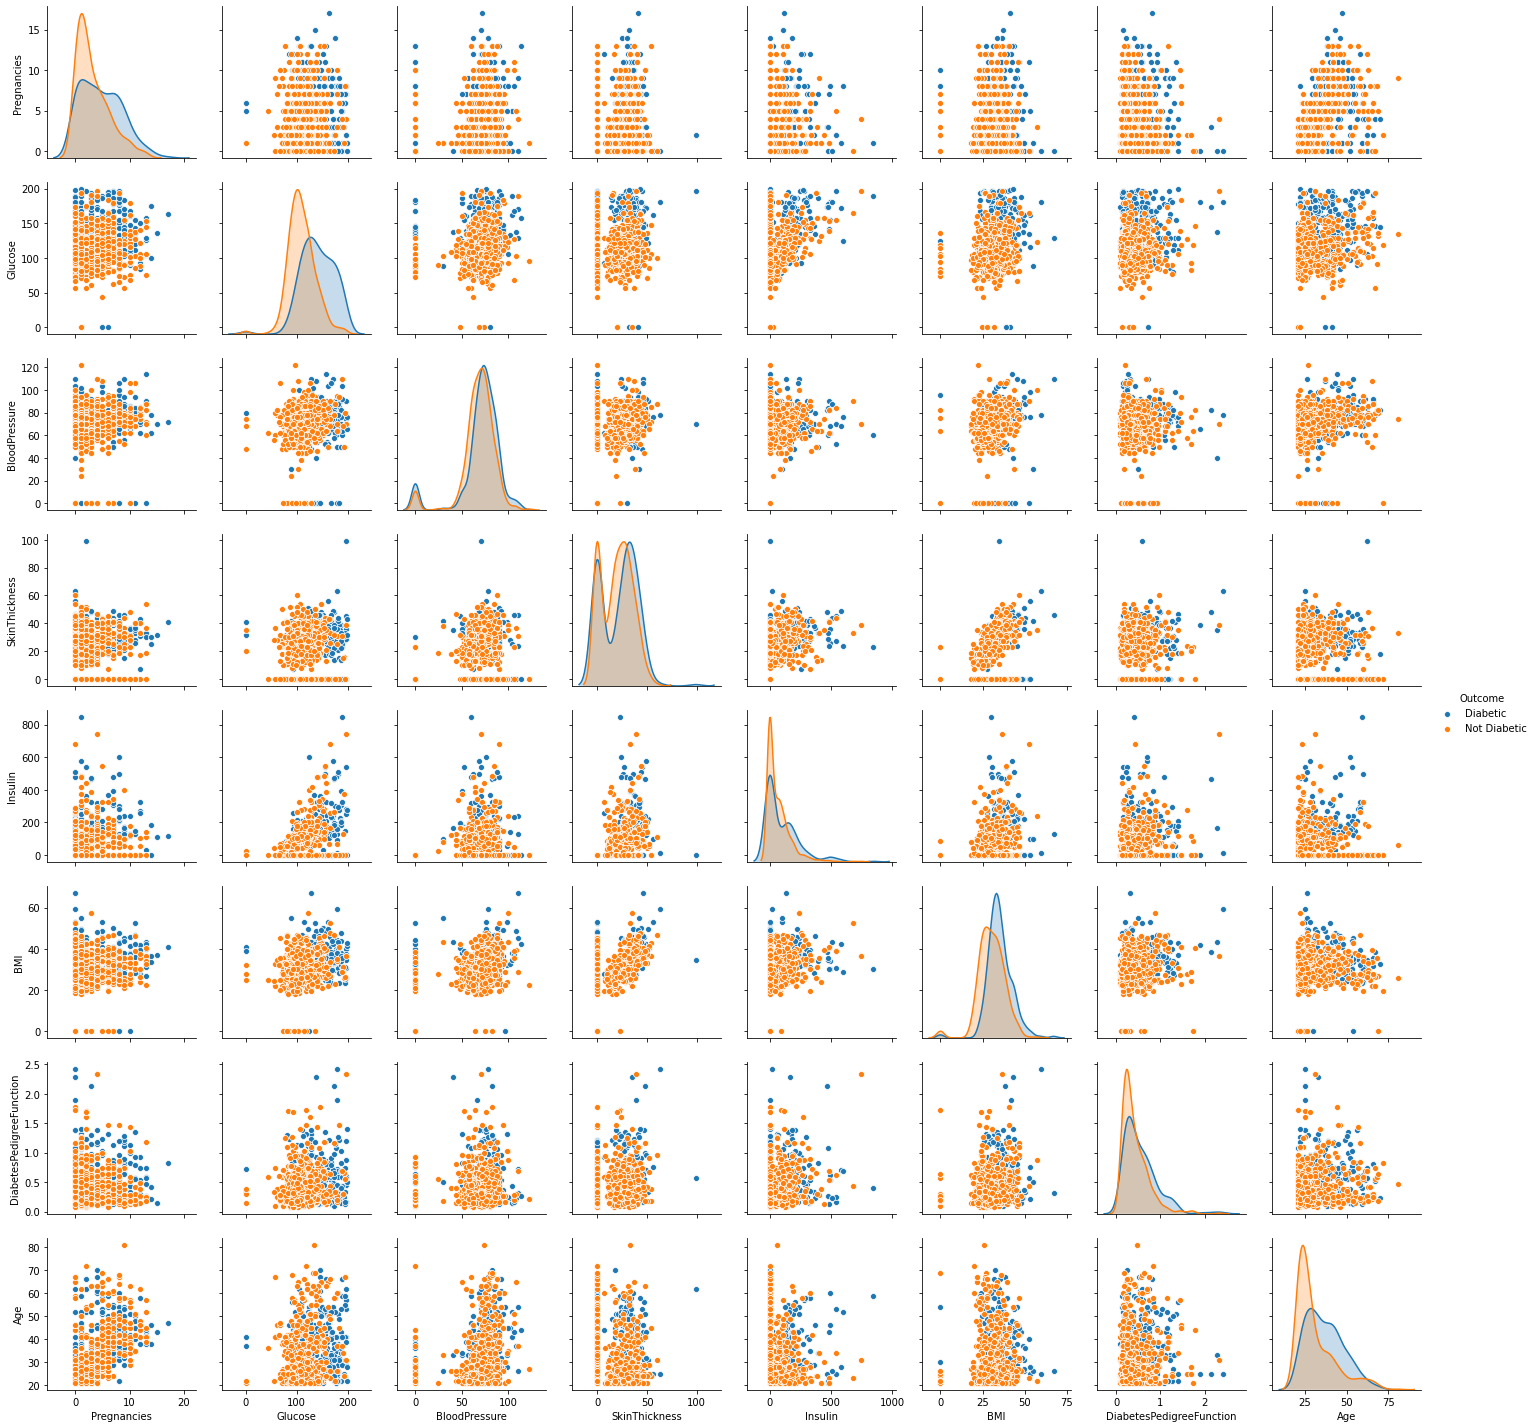

In [216]:
sns.pairplot(df,hue="Outcome")

In [217]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [218]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [219]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [220]:
#Install pytorch in Anaconda using the following command
#conda install -c peterjc123 pytorch

In [221]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [222]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [223]:
df.shape

(768, 9)

In [224]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [225]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [226]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [227]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [228]:
epochs=800
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==0:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 10 and the loss : 0.6956122517585754
Epoch number: 20 and the loss : 0.6048518419265747
Epoch number: 30 and the loss : 0.592286229133606
Epoch number: 40 and the loss : 0.568830668926239
Epoch number: 50 and the loss : 0.5538845062255859
Epoch number: 60 and the loss : 0.5422552227973938
Epoch number: 70 and the loss : 0.5321905016899109
Epoch number: 80 and the loss : 0.5231794714927673
Epoch number: 90 and the loss : 0.5144454836845398
Epoch number: 100 and the loss : 0.5063003897666931
Epoch number: 110 and the loss : 0.5002337694168091
Epoch number: 120 and the loss : 0.4958083927631378
Epoch number: 130 and the loss : 0.4830179512500763
Epoch number: 140 and the loss : 0.4766910672187805
Epoch number: 150 and the loss : 0.4757860004901886
Epoch number: 160 and the loss : 0.5076732039451599
Epoch number: 170 and the loss : 0.47331178188323975
Epoch number: 180 and the loss : 0.4574795663356781
Epoch number: 190 and the loss : 0.4510982632637024
Epoch number: 200 and 

In [229]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

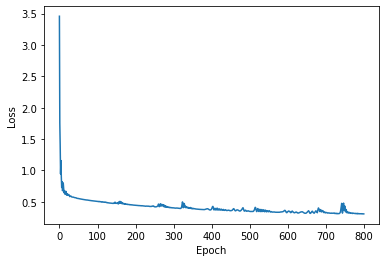

In [230]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [231]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [232]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [18, 29]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

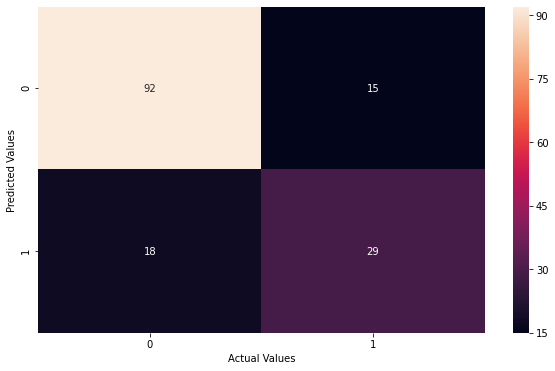

In [233]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [234]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7857142857142857

In [235]:
#### Save the model
torch.save(model,'diabetes.pt')

C:\Users\rohit\Anaconda3\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [236]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [237]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [238]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [239]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [240]:
new_data=torch.tensor(lst1)

In [241]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    pred = model(new_data).argmax().item()
    if pred == 1:
        print("Person is diabetic")
    else:
        print("Person is not diabetic")


tensor([0.6246, 1.7800])
Person is diabetic
